
# HW1 -  Multi Dimensional data analysis - Team 6
### 312425036
### 205592652
### 316736396


In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.display import Image

In [2]:
#Constants definition
PATH = "Chemical Composion of Ceramic  edited.csv"
Y_INDEX = 4
NUM_OF_COLUMNS = 17
SUBSET_SIZE = 60
NUM_OF_SUBSETS = 3
RIDGE_LAMBDA = 1e-1
RIDGE_LAMBDA2 = 1e-4
RIDGE_LAMBDA3 = 1e-10
TEST_SIZE = 0.2


In [3]:
#Arguments class
class Args():

    def __init__(self, *args):
        super(Args, self).__init__(*args)
        self.path = PATH
        self.yIndex = Y_INDEX
        self.xIndices = list(range(1, NUM_OF_COLUMNS + 1))
        self.xIndices.remove(self.yIndex)
        self.xIndices = np.array(self.xIndices)
        self.ridgeLamda = RIDGE_LAMBDA
        self.ridgeLamda2 = RIDGE_LAMBDA2
        self.ridgeLamda3 = RIDGE_LAMBDA3
        self.testSize = TEST_SIZE
        self.lassoLamdas = [1e-8, 1e-5, 1e-4,
                            1e-3, 1e-2, 1e-1, 1, 5, 10, 100]

# Dataset

In [4]:
#Dataset pre-processing
class Dataset():
    def __init__(self, *args, **keywords):
        self.data = pd.read_csv(keywords["path"])
        self.columns = self.data._reindex_columns
        data_as_array = self.data.to_numpy()
        self.yIndex = keywords["yIndex"] - 1
        self.xIndices = keywords["xIndices"] - 1
        self.X = data_as_array[:, self.xIndices]
        self.y = data_as_array[:, self.yIndex]
        print(f"Dataset question 3, shape of X & Y:\n{np.ones((len(self.X), 1)).shape, self.X.shape}")
        # create w0 with shape num_of_rows X 1
        w0 = np.ones((len(self.X), 1))
        # Concatenate between w0 and X to matrix of size 88 X 17
        self.X = np.concatenate((w0, self.X), axis=1)
        # create 6 corelated columns as last columns
        self.addedColumns = np.zeros((len(self.X), 6))
        self.addedColumns[:, 0] = self.X[:, 1] + self.X[:, 2]
        self.addedColumns[:, 1] = self.X[:, 3] + self.X[:, 4]
        self.addedColumns[:, 2] = self.X[:, 5] + self.X[:, 6]
        self.addedColumns[:, 3] = self.X[:, 7] + self.X[:, 8]
        self.addedColumns[:, 4] = self.X[:, 9] + self.X[:, 10]
        self.addedColumns[:, 5] = self.X[:, 11] + self.X[:, 12]
        self.X = np.concatenate((self.X, self.addedColumns), axis=1)
        # create 3 subsets of the data
        self.subsets = self.createSubsets(NUM_OF_SUBSETS)
        # split for train and test - lasso
        self.splitTrainAndTest(testSize=keywords["testSize"])
    
    #Subsets creations X^A, X^B, X^C
    def createSubsets(self, numOfSubsets):
        subsets = []
        for i in range(numOfSubsets):
            randomIndices = np.random.randint(
                low=0, high=len(self.X), size=SUBSET_SIZE)
            subsets.append((self.X[randomIndices, :],
                            self.y[randomIndices]))
        print(f"Each Subset shape is: {subsets[1][0].shape}")
        return subsets
    
    #Split into train & Test - Lasso regression step #1
    def splitTrainAndTest(self, testSize=0.2):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=testSize, random_state=42)

In [6]:
args = Args()
dataset = Dataset(path=args.path, xIndices=args.xIndices,yIndex=args.yIndex, testSize=args.testSize)

print(f"Y index is: {dataset.yIndex}")
print(f"X index is: {dataset.xIndices}")
print(f"X shape is: {dataset.X.shape}")

subsets = dataset.subsets



Dataset question 3, shape of X & Y:
((88, 1), (88, 16))
Each Subset shape is: (60, 23)
Y index is: 3
X index is: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16]
X shape is: (88, 23)


# Stability of w

In [7]:
class Regression():
    def __init__(self, X: np.array, y: np.array, Wx=""):
        self.X = X
        self.y = y
        self.Wx = Wx
        self.calculateCoefficients(Wx)

    def calculateCoefficients(self, Wx=""):
        X_transpose = np.transpose(self.X)
        XtX = np.matmul(X_transpose, self.X)
        self.w = np.matmul(np.matmul(np.linalg.inv(XtX), X_transpose), self.y)
        print(f"The shape of {Wx} is:{self.w.shape}")
        print(f"The coeficients of {Wx} are:\n{self.w}\n")
        
def plotFigrueOfRegressionCoefficients(wA, wB, wC, titleAddition=""):
    x = range(2, 24)
    distA_B = np.linalg.norm(wA-wB)
    distA_C = np.linalg.norm(wA-wC)
    distB_C = np.linalg.norm(wB-wC)
    print(
        f"The distance between wA and wB is {distA_B}\n The distance between wA and wC is {distA_C}\n The distance between wB and wC is {distB_C}\n")
    plt.plot(x, wA[1:], color='red', linestyle='--')
    plt.plot(x, wB[1:], color='blue', linestyle='--')
    plt.plot(x, wC[1:], color='green', linestyle='--')
    plt.xlabel("Index of coefficeint(wi")
    plt.ylabel("Coefficeint size in log scale")
    plt.title("Coefficeints stability for different datasets "+titleAddition)

    plt.show()


The shape of Wa is:(23,)
The coeficients of Wa are:
[-1.05534926e+02 -7.33724005e+02  2.42052314e+02  3.47695033e+01
 -5.89834544e+01  2.68420439e+01  7.68579742e+02 -1.96837363e+02
  1.51997007e-01 -4.93099704e-01  2.64852409e-01 -5.39250698e-01
 -5.83568382e-01 -1.84639760e-06  1.15711860e-04 -3.87262142e-06
 -7.62545249e-06  3.21289133e+02 -3.58710165e+00 -2.21602631e+01
 -9.28272140e-02 -1.64005747e-01  6.10429840e-01]

The shape of Wb is:(23,)
The coeficients of Wb are:
[ 4.56329236e+02 -3.11063128e+02  3.51196091e+02 -9.07248087e+00
 -5.00689783e+01 -2.81138616e+01 -1.77521599e+02  3.73468089e+01
 -1.06650591e-05 -8.88998032e-01 -5.34227903e-01 -1.39359438e-02
 -4.65957201e-02 -3.21142041e-06 -1.19194763e-04  7.37222139e-06
  1.31635269e-05  5.83834650e+01  3.36894321e+00  1.09860232e+01
 -3.82204530e-02  2.88476613e-01  2.45391846e-02]

The shape of Wc is:(23,)
The coeficients of Wc are:
[ 9.60744342e+02  2.01020245e+01  1.53001277e+02 -1.12908982e+01
 -1.30387813e+02 -2.8457007

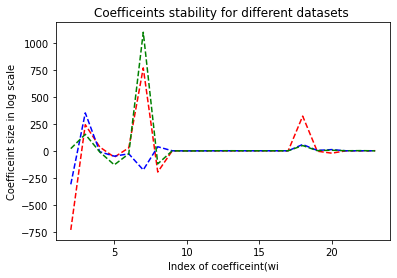

In [8]:
#Compute Wa, Wb & Wc coeficients
basicRegressionA = Regression(subsets[0][0], subsets[0][1], "Wa")
basicRegressionB = Regression(subsets[1][0], subsets[1][1], "Wb")
basicRegressionC = Regression(subsets[2][0], subsets[2][1], "Wc")
#print(basicRegressionA.w, basicRegressionB.w, basicRegressionC.w)
plotFigrueOfRegressionCoefficients(basicRegressionA.w, basicRegressionB.w, basicRegressionC.w)

### We see for different runs most of the Wx values are very low and we have some coeficients that are very large (10^3, -1.7*10^3) ==> those coeficients are large and unstable. As we learned this may be cause problems in inverting the (X^T * X) matrix (close to singular). This may cause to huge difference in Wx coefficients for different subsets  

# Ridge Regresion

In [9]:
class RidgeRegression(Regression):
    def __init__(self, X: np.array, y: np.array, lamda: float, Wx=""):
        self.lamda = lamda
        self.Wx=Wx
        super(RidgeRegression, self).__init__(X, y, Wx)

    def calculateCoefficients(self, Wx=""):
        X_transpose = np.transpose(self.X)
        XtX = np.matmul(X_transpose, self.X)
        regularizationTerm = self.lamda * np.eye(len(XtX))
        XtX += regularizationTerm
        self.w = np.matmul(np.matmul(np.linalg.inv(XtX), X_transpose), self.y)
        print(f"The shape of {Wx} is:{self.w.shape}")
        print(f"The coeficients of {Wx} are:\n{self.w}\n")

Ridge regression with lambda=0.1
The shape of wA is:(23,)
The coeficients of wA are:
[ 6.36903322e+01  2.50335156e+00 -5.57164332e+00 -3.79647470e-02
 -3.77869001e-01 -1.56816014e+00  2.35485179e+00 -3.33678929e-01
  1.66835321e-01 -4.00515315e-02  3.61652679e-02 -3.02938232e-02
  4.13166923e-02  1.18054402e-02 -3.31769559e-02  2.53106509e-02
  7.29561935e-03 -3.06830644e+00 -4.15834563e-01  7.86715234e-01
 -1.66859366e-01 -3.88626287e-03  1.10228562e-02]

The shape of wB is:(23,)
The coeficients of wB are:
[ 5.20655455e+01  2.15924358e+00 -2.64404218e+00 -2.93318275e-01
  9.85523130e-02 -3.86944267e+00  7.25462928e+00 -8.22577126e-01
  4.10484902e-01 -4.19346336e-03  2.52588365e-02 -2.08179133e-02
  4.35694013e-02  1.78967234e-02 -3.08137401e-02  1.86763901e-02
  1.42061999e-03 -4.84781653e-01 -1.94762354e-01  3.38519860e+00
 -4.12092571e-01  2.10653836e-02  2.27514726e-02]

The shape of wC is:(23,)
The coeficients of wC are:
[ 6.08617350e+01  1.20320706e+00 -2.96030330e+00 -2.1147039

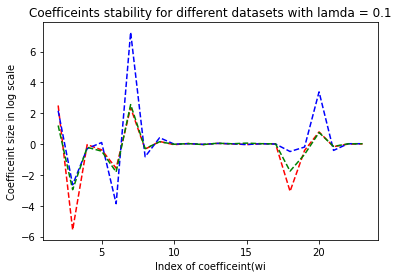

Ridge regression with lambda=0.0001
The shape of wA is:(23,)
The coeficients of wA are:
[ 9.89316601e+01 -3.12023622e-01 -3.14600668e-01 -3.32070969e-01
 -3.33239663e-01 -3.16860867e-01 -3.27820293e-01 -6.73713472e-01
  3.29530221e-01 -1.21020744e-04  7.34520824e-05 -5.97468034e-05
  1.09077898e-04  1.73341392e-05  7.70200131e-05  2.15747657e-05
  3.81193700e-06 -6.76359081e-01 -6.66818970e-01 -6.81673698e-01
 -3.29539365e-01 -5.28199638e-05  2.51149396e-05]

The shape of wB is:(23,)
The coeficients of wB are:
[ 9.88675709e+01 -3.33454574e-01 -3.31431686e-01 -3.34776410e-01
 -3.26946501e-01 -3.43650180e-01 -3.13011553e-01 -6.65716540e-01
  3.33008895e-01 -6.38646325e-05  9.36283183e-05 -1.18653254e-04
  1.38549385e-04  3.36001016e-05 -1.84434725e-04  4.11497944e-05
  1.53529551e-05 -6.72913503e-01 -6.64148230e-01 -6.55006560e-01
 -3.33019443e-01  3.90042856e-05  6.10404908e-06]

The shape of wC is:(23,)
The coeficients of wC are:
[ 9.89703890e+01 -3.29546504e-01 -3.39205490e-01 -3.3483

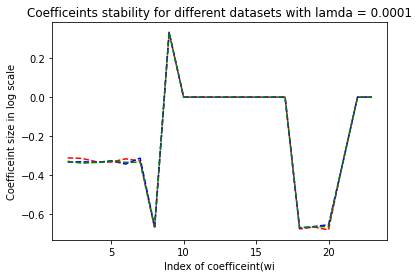

Ridge regression with lambda=1e-10
The shape of wA is:(23,)
The coeficients of wA are:
[ 3.82571383e+03 -3.76663214e+03 -1.47267754e+03 -7.88841580e+01
 -1.55751598e+02 -3.16678744e+01 -3.17048795e+03  7.06256418e+02
  4.67179799e-01 -2.90770977e+00 -1.65022938e+00  5.30618649e-01
  3.32857571e-01 -1.84637843e-06  1.15711820e-04 -3.87259482e-06
 -7.62544100e-06 -6.79641634e-01 -8.15951328e-01 -7.95883441e-01
  9.74630404e-02  8.12309341e-01 -2.76229401e-01]

The shape of wB is:(23,)
The coeficients of wB are:
[-3.09878288e+04 -4.07280126e+03  4.78398978e+03 -2.06754098e+02
  4.20887028e+03  6.27127782e+02 -4.54999425e+04  7.45964036e+03
 -3.23607391e+00 -3.89376526e+01  1.01095200e+00  1.54190974e+01
  4.22634125e-01 -3.21138262e-06 -1.19194829e-04  7.37225539e-06
  1.31635291e-05 -2.88562248e-01  2.90203377e+00 -5.06019878e-01
 -8.10615387e-01 -2.14385895e+00 -3.82216278e+00]

The shape of wC is:(23,)
The coeficients of wC are:
[ 1.07301365e+03  3.34390791e+02  1.15214230e+03 -1.65461

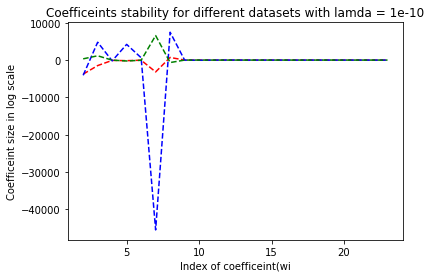

In [10]:
# lamda1
print(f"Ridge regression with lambda={str(args.ridgeLamda)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda))
#lamda2
print(f"Ridge regression with lambda={str(args.ridgeLamda2)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda2,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda2,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda2,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda2))
#lamda3
print(f"Ridge regression with lambda={str(args.ridgeLamda3)}")
ridgeA = RidgeRegression(subsets[0][0], subsets[0][1], args.ridgeLamda3,"wA")
ridgeB = RidgeRegression(subsets[1][0], subsets[1][1], args.ridgeLamda3,"wB")
ridgeC = RidgeRegression(subsets[2][0], subsets[2][1], args.ridgeLamda3,"wC")
plotFigrueOfRegressionCoefficients(ridgeA.w, ridgeB.w, ridgeC.w, titleAddition="with lamda = "+str(args.ridgeLamda3))

## Ridge Regression Insights:
### Using the ridge regression we calculate w by: w= (X.T*X + Lambda*I)^-1 * X.T*y for each of our 3 subset.  Each time we do this for different lambda. 
### lambda=0.1
#### We can see that for lambda=0.1 the maximum values for the coeficients of Wx's are in much smaller scale --> the maximum value equals to 6. The regularization term caused the coeficient to shrink but the MSE got bigger.

### lambda=0.0001
#### We can see that for lambda=0.0001 the maximum values for the coeficients of Wx's are in much smaller scale --> the maximum value equals to -0.7.  The regularization term caused the coefficient to shrink even more with this lambda and the SSE is closer to min SSE.

### lambda=1e-10
#### We can see that for lambda=1e-10 the maximum values for the coeficients of Wx's are again with large scale --> the axis have again large values of 6*10^3 . unstable cause regularization term close to zero.

#### From those 3 options, for the ridge regression we would like to choose lambda=0.0001 which gave us the best shrinkage for the subsets coeficients.

# Lasso Regression

In [11]:
class LassoRegression(Regression):
    def __init__(self, X: np.array, y: np.array, lamda: float, Wx=""):
        self.lamda = lamda
        self.Wx=Wx
        super(LassoRegression, self).__init__(X, y, Wx)

    def calculateCoefficients(self, Wx=""):
        self.clf = linear_model.Lasso(alpha=self.lamda)
        self.clf.fit(self.X, self.y)
        self.w = self.clf.coef_

    def predict(self, X):
        return self.clf.predict(X)

    def calculateMSE(self, yTrue, yPredict):
        return mean_squared_error(yTrue, yPredict)


def plotMSEbyLamda(lamdas: list, mse: list):
    plt.plot(lamdas, mse, color='red', linestyle='--')
    plt.xscale("log")
    plt.xlabel("lamda(log scale)")
    plt.ylabel("MSE")
    plt.title("MSE by lamda for Lasso Regression")
    plt.show()


for lamda 1e-08 - number of parameters!=0 : 22
for lamda 1e-05 - number of parameters!=0 : 22
for lamda 0.0001 - number of parameters!=0 : 20
for lamda 0.001 - number of parameters!=0 : 19
for lamda 0.01 - number of parameters!=0 : 17
for lamda 0.1 - number of parameters!=0 : 14
for lamda 1 - number of parameters!=0 : 11
for lamda 5 - number of parameters!=0 : 8
for lamda 10 - number of parameters!=0 : 5
for lamda 100 - number of parameters!=0 : 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3202471670866998, tolerance: 0.057322110857142825
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3055305501955843, tolerance: 0.057322110857142825
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2841633201989175, tolerance: 0.057322110857142825
  positive)


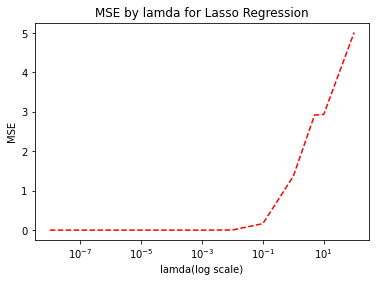

The reccomended lambda (knee location) is:
 (0.1, array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.75885163e-01,
        8.02780584e-05, -3.21023965e-03,  8.22837798e-04,  3.22100188e-03,
       -4.43471313e-04,  1.66582294e-03,  7.90491512e-03, -1.82519157e-03,
       -5.36544174e-04, -6.40459873e-02, -9.81319707e-01, -9.84310507e-01,
       -3.58786979e-04, -0.00000000e+00,  0.00000000e+00]), 0.16499089258775268)


In [13]:
#best_lamda is lamda2

# Lasso
lamdasForLasso = args.lassoLamdas
lassoResults = []
mseList = []
for lamda in lamdasForLasso:
    lassoReg = LassoRegression(dataset.X_train, dataset.y_train, lamda)
    yPredict = lassoReg.predict(dataset.X_test)
    mse = lassoReg.calculateMSE(dataset.y_test, yPredict)
    mseList.append(mse)
    lassoResults.append((lamda, lassoReg.w, mse))
    total = 0
    for elem in lassoReg.w:
        if(elem != 0):
            total += 1
    print(f"for lamda {lamda} - number of parameters!=0 : {total}")
plotMSEbyLamda(lamdasForLasso, mseList)
print(f"The reccomended lambda (knee location) is:\n {lassoResults[5]}")

## Lasso regression Insights:
### We can see that as our lambda increases the number of non zero coeficients decrease in a way that many features are actually dropped and we are left with less parameters. As we can see in the graph above of regression's MSE Vs. alpha, the MSE values are low and pretty stable untill lamda gets to lambda=0.1 there we get MSE=0.165 and from that point it rises exponentially in a way that our next data point for lambda get a value of MSE=1.36 --> More that X10 higher and by using lambda=1 instead lamda=0.1 we gain only in a drop of 3 parameters, thoose we would pick our pull point for alpha as 0.1, in that point we'll have 14 non-zero values.Its gives us the best result in the tradeoff between MSE and model complexity.

# Question #2

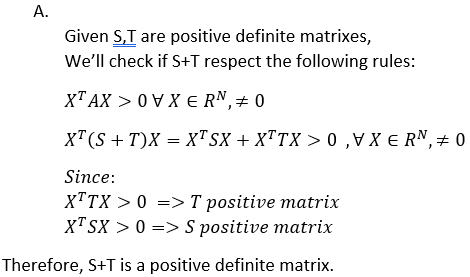

In [ ]:
#Answer for Question 2A
Image("Q2A.png")

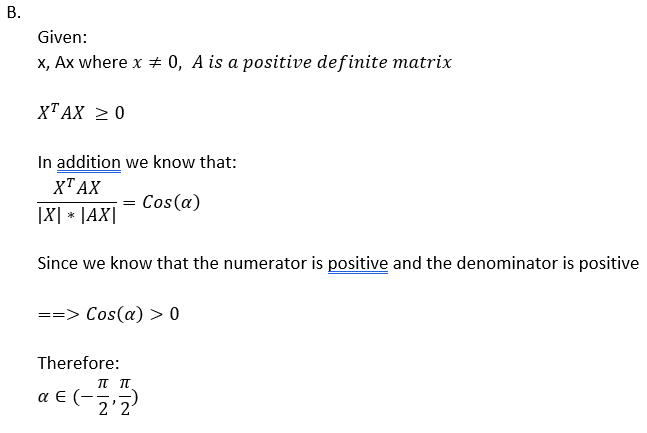

In [ ]:
#Answer for Question 2B
Image("Q2B.png")

# Question 3 - Understanding PCA:

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
def myPca(X, num_components):
    X_normalized = StandardScaler().fit_transform(X)
    # calculate the mean of each column
    Mean_col = np.mean(X, axis=0)
    Std_col = np.std(X, axis=0)

    # calculate covariance matrix
    cov_mat = np.cov(X_normalized, rowvar=False)

    # eigendecomposition of covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    eigenvalue_subset = sorted_eigenvalue[0:num_components]
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # In the assigment requested to compute the spectral decomposition
    D_matrix = eigenvalue_subset*np.identity(num_components)
    A_matrix = eigenvector_subset@D_matrix@eigenvector_subset.T

    # Get the new projected data  pcaData = normalizedData * projectionVectors
    X_projected = np.dot(X_normalized, eigenvector_subset)

    return Mean_col, Std_col, X_normalized, eigenvalue_subset, eigenvector_subset, X_projected

In [16]:
if __name__ == "__main__":
    data = load_wine()

    Mean_col, Std_col, X_normalized, eigenvalues, eigenvectors, X_projected = myPca(
        data.data, 3)

In [17]:
# Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_projected, columns=['PC1', 'PC2', 'PC3'])

In [18]:
# Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(data.target, columns=['target'])], axis=1)

No handles with labels found to put in legend.


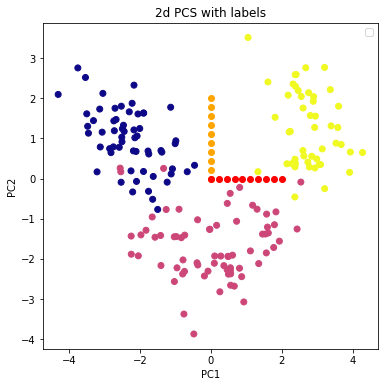

In [19]:
# Plot the 2d PC's
pc1 = np.array([np.linspace(0, 2, num=10)*0, np.linspace(0, 2, num=10)]).T
pc2 = np.array([np.linspace(0, 2, num=10)*1,
                np.linspace(0, 2, num=10)*0]).T
plt.figure(figsize=(6, 6))
plt.scatter(principal_df["PC1"].to_numpy(), principal_df["PC2"].to_numpy(),
            c=principal_df["target"].to_numpy(), cmap='plasma')
plt.legend()
plt.scatter(pc1[:, 0], pc1[:, 1],
            color='orange', marker='o')
plt.scatter(pc2[:, 0], pc2[:, 1],
            color='red', marker='o')
plt.title('2d PCS with labels')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [20]:
# PCA reconstruction=PC scores⋅Eigenvectors.T+Mean
reconstructed_X = (X_projected@eigenvectors.T)*Std_col + Mean_col

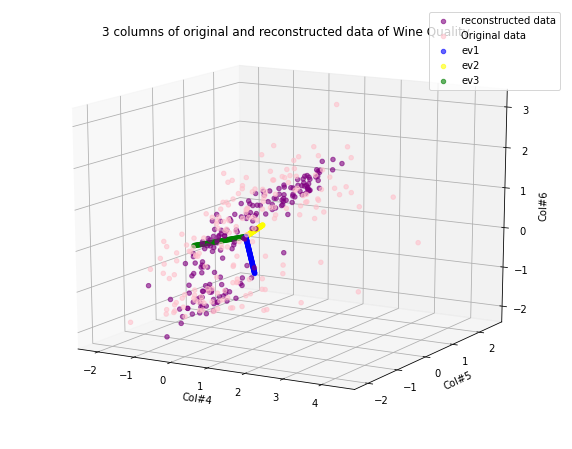

In [21]:
# Plot 3d graph for reconstruction plot for column #4,#5 & #6
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -60)
original_class = X_normalized
recon_class = X_projected@eigenvectors.T
ax.scatter(recon_class[:, 4], recon_class[:, 5], recon_class[:, 6],
           color='purple', alpha=0.6, label='reconstructed data')
ax.scatter(original_class[:, 4], original_class[:, 5],
           original_class[:, 6], color='pink', alpha=0.6, label='Original data')
# plot pcs directions
t = np.linspace(0, 2, num=100)
ex, ey, ez = t*eigenvectors[3, 0], t * \
    eigenvectors[4, 0],  t*eigenvectors[5, 0]
ax.scatter(ex, ey,
           ez, color='blue', alpha=0.6, label='ev1')
ex, ey, ez = t*eigenvectors[3, 1], t * \
    eigenvectors[4, 1],  t*eigenvectors[5, 1]

ax.scatter(ex, ey,
           ez, color='yellow', alpha=0.6, label='ev2')
ex, ey, ez = t*eigenvectors[3, 2], t * \
    eigenvectors[4, 2],  t*eigenvectors[5, 2]
ax.scatter(ex, ey,
           ez, color='green', alpha=0.6, label='ev3')
# chart
plt.title("3 columns of original and reconstructed data of Wine Quality")
ax.set_xlabel('Col#4')
ax.set_ylabel('Col#5')
ax.set_zlabel('Col#6')
plt.legend()
plt.show()

# Question 3 - Dry bean classification using PCA and KNN:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_validate
#from Main_3_1 import myPca
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [25]:
if __name__ == "__main__":
    # Use pandas excel reader
    data_file = './DryBeanDataset/Dry_Bean_Dataset.xlsx'
    data = pd.read_excel(data_file, sheet_name='Dry_Beans_Dataset')

In [26]:
# scramble the order of the database
data = data.sample(frac=1).reset_index(drop=True)

In [27]:
# Change lables to numeric values
data[['Class']] = data[['Class']].apply(
    lambda col: pd.Categorical(col).codes)

data['Class'].unique()

array([4, 3, 1, 5, 2, 6, 0], dtype=int8)

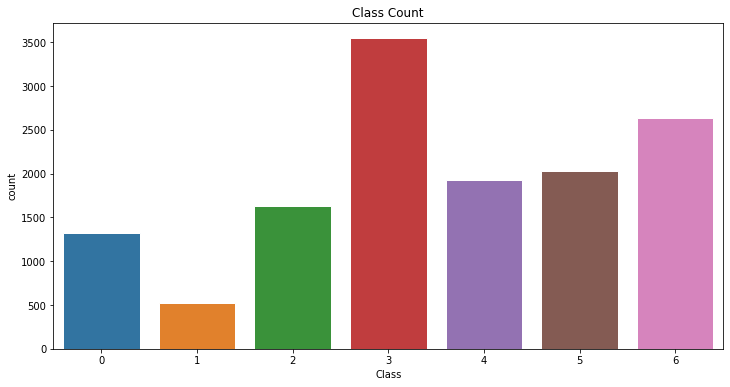

In [28]:
#Plot class counts
plt.figure(figsize=(12, 6))
plt.title('Class Count')
sns.set_style('white')
sns.countplot(x='Class', data=data)
plt.show()

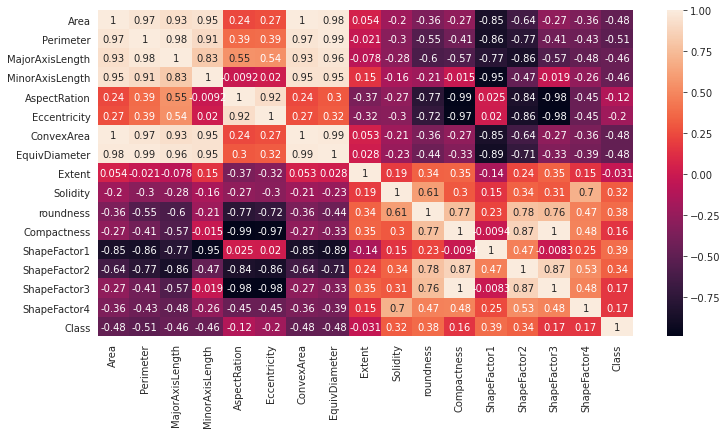

In [29]:
#Plot corelation map
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [30]:
# Divide the data to input features and output
X = data.drop(["Class"], axis=1)
Y = data["Class"]

In [32]:
# Split the data into 10000 train+test & validation of 3611
X_train_test, X_val, y_train_test, y_val = train_test_split(
    X, Y, train_size=0.7347) 

In [33]:
#for each value of d (d = 1 : 16), run a 5-fold cross validation (train = 8000 samples, test = 2000 samples) PCA+KNN for classification.
accuracy = []
models = []
for i in np.arange(1, 16):
    Mean_col, Std_col, X_normalized, eigenvalues, eigenvectors, X_projected = myPca(
        X_train_test.values, i)

    model = KNeighborsClassifier(n_neighbors=3)
    # StratifiedKFold CV is being done
    results = cross_validate(model, X_projected, y_train_test, scoring="accuracy",
                             cv=5, return_train_score=True, return_estimator=True)
    # we'll store the average value of accuracy calculated over all the 5 CV sets
    best_model = np.argmax(results['test_score'])
    accuracy.append(results['test_score'].mean())
    models.append(results['estimator'][best_model])

No handles with labels found to put in legend.


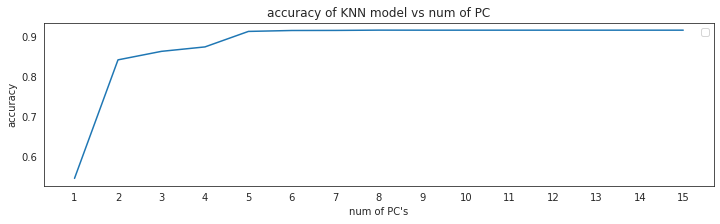

In [34]:
#Plot accuracy VS num of PCs
plt.figure(figsize=(12, 3))
accuracy = np.array(accuracy)
plt.plot(np.arange(1, 16), accuracy)
plt.xlabel("num of PC's")
plt.ylabel("accuracy")
plt.title("accuracy of KNN model vs num of PC")
plt.xticks(np.arange(1, 16))
plt.legend()
plt.show()

In [35]:
# get d where accuracy is the best
max_d_accuracy = np.argmax(accuracy)
num_of_pcs = max_d_accuracy + 1

In [36]:
#Save the dimension d that results with the highest average accuracy
max_d_Mean_col, max_d_Std_col, max_d_X_normalized, max_d_eigenvalues, max_d_eigenvectors, max_d_X_projected = myPca(
    X_train_test.values, num_of_pcs)

In [37]:
# model with max_d pca components
model = models[max_d_accuracy]
# To verify that these eigenvectors are orthogonal, we will compute their dot product to show that its equal 0
np.dot(max_d_eigenvectors[:, 0], max_d_eigenvectors[:, 1])

0.0

#### Indeed we see that the eigenvectors are orthogonal and their dot prodoct equals to 0

In [38]:
print(
    f'd equals {max_d_accuracy+1}, plotting the projected data to the first 3 PCs')

d equals 8, plotting the projected data to the first 3 PCs


In [39]:
# Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(max_d_X_projected[:, 0:3], columns=[
                            'PC1', 'PC2', 'PC3']).reset_index(drop=True)
y_train_test_df = pd.DataFrame(
    y_train_test, columns=['Class']).reset_index(drop=True)
# Concat it with target variable to create a complete Dataset
projected_data = pd.concat([principal_df, y_train_test_df], axis=1)

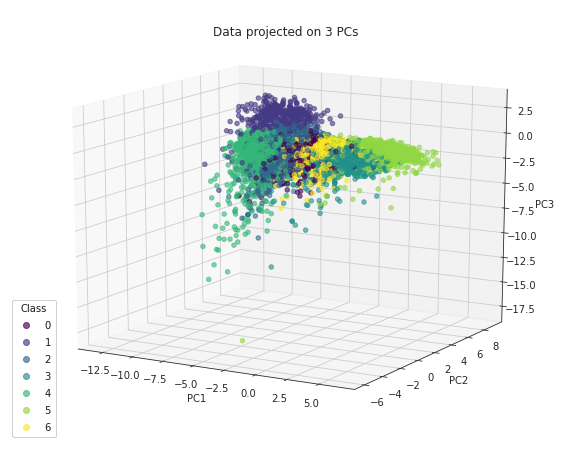

In [40]:
# Plot 3d graph for PC1, PC2 & PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -60)

scatter = ax.scatter(projected_data['PC1'], projected_data['PC2'], projected_data['PC3'],
                     c=projected_data['Class'], cmap="viridis", alpha=0.6, label='Class')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Class")
ax.add_artist(legend1)

# chart
plt.title("Data projected on 3 PCs")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [41]:
# Project the validation set into the top d PCs
# first normalize the validation
scaler = StandardScaler()
scaler.fit(X_train_test.values)
X_val_normalized = scaler.transform(X_val)

In [42]:
# Get the new projected data  pcaData = normalizedData * projectionVectors
X_val_projected = np.dot(X_val_normalized, max_d_eigenvectors)
accuracy_val = model.score(X_val_projected, y_val)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


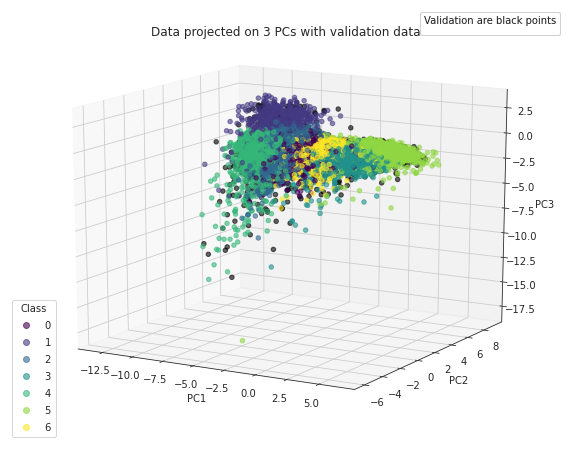

In [43]:
# Plot the train and the validation toghether
# Plot 3d graph for PC1, PC2 & PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15, -60)

scatter = ax.scatter(projected_data['PC1'], projected_data['PC2'], projected_data['PC3'],
                     c=projected_data['Class'], cmap="viridis", alpha=0.6, label='Class')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Class")
ax.add_artist(legend1)

# chart
plt.title("Data projected on 3 PCs with validation data")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add the validation data points in black
scatter = ax.scatter(
    X_val_projected[:, 0], X_val_projected[:, 1], X_val_projected[:, 2], color='black', alpha=0.6)
legend2 = ax.legend(*scatter.legend_elements(),
                    title="Validation are black points")
ax.add_artist(legend2)

plt.show()

#### it's a bit hard to see it in the jupiter but the data is separated pretty good with the labels using the PC1,2,3

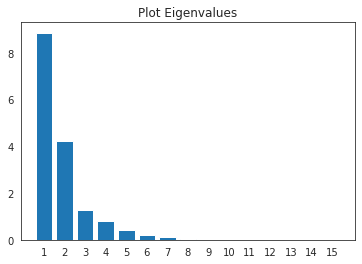

In [44]:
# Plot the Eigenvalues of the constructed PCA
x_pos = np.arange(len(eigenvalues))
# Create bars
plt.bar(x_pos, eigenvalues)
# Create names on the x-axis
plt.xticks(x_pos, x_pos+1)
# Show graphic
plt.title('Plot Eigenvalues')
plt.show()

In [45]:
# Calculate the explained variation
eig_vals_total = np.sum(eigenvalues)
var_exp = eigenvalues / eig_vals_total
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ', var_exp)
print('Cumulative Variance Explained: ', cum_var_exp[max_d_accuracy])

Variance Explained:  [5.53891590e-01 2.64884139e-01 8.04431892e-02 5.09061237e-02
 2.72921646e-02 1.15512094e-02 7.02564073e-03 3.29789484e-03
 5.19323750e-04 9.13875832e-05 6.87230716e-05 1.84341256e-05
 9.35562266e-06 6.82096052e-07 1.42881161e-07]
Cumulative Variance Explained:  0.9992919508693958


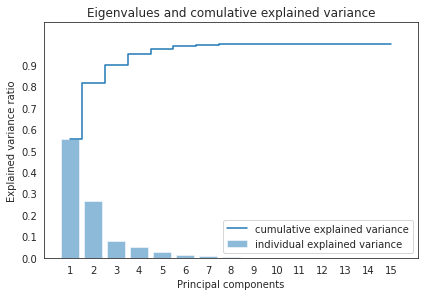

In [46]:
# Plot the explained variation
tmp = np.arange(len(eigenvalues))+1
plt.bar(tmp, var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(tmp, cum_var_exp,
         where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xticks(tmp)
plt.yticks(np.arange(1, step=0.1))
plt.xlabel('Principal components')
plt.ylim(0, 1.1)
plt.legend(loc='best')
plt.tight_layout()
plt.title("Eigenvalues and comulative explained variance")
plt.show()

In [47]:
# PCA reconstruction=PC scores⋅Eigenvectors.T+Mean
reconstructed_X = (max_d_X_projected @
                   max_d_eigenvectors.T) * Std_col + Mean_col

In [48]:
# Calculate reconstruction error
rmse = sqrt(mean_squared_error(X_train_test, reconstructed_X))
r2 = r2_score(X_train_test, reconstructed_X)
print(
    f"r2 reconstruction error is: {r2} equals to cumulative explained variance")

r2 reconstruction error is: 0.9992918368444661 equals to cumulative explained variance


In [49]:
fig = plt.figure(figsize=(10, 8))
# set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(eigenvectors[:, 1]))+1
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

<Figure size 720x576 with 0 Axes>

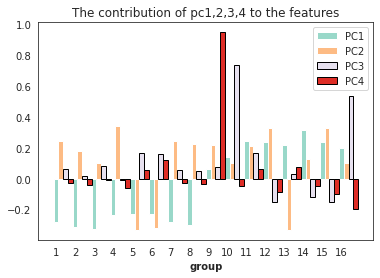

In [50]:
# Make the plot
plt.bar(r1, eigenvectors[:, 0], color='#99d8c9',
        width=barWidth, edgecolor='white', label='PC1')
plt.bar(r2, eigenvectors[:, 1], color='#fdbb84',
        width=barWidth, edgecolor='white', label='PC2')
plt.bar(r3, eigenvectors[:, 2], color='#e7e1ef',
        width=barWidth, edgecolor='black', label='PC3')
plt.bar(r4, eigenvectors[:, 3], color='#de2d26',
        width=barWidth, edgecolor='black', label='PC4')

# Add xticks on the middle of the group bars
plt.xticks(np.arange(len(eigenvectors[:, 1]))+1)
plt.xlabel('group', fontweight='bold')
plt.title("The contribution of pc1,2,3,4 to the features")
# Create legend & Show graphic
plt.legend()
plt.show()

##### PC3 & PC4 have black line around them for easier identification 

### For PC3 the most contributing features are: 10 & 16 with positive contribution and we see that feature 12,14,15 have some negative contibution

### For PC4 the most contributing features are: 9 with positive contribution and 16 with negative contibution